<h1 align="center"> Практична робота № 5 </h1>
<h2 align="center"> <b> Лінійна регресія </b> </h2>
<hr> <h3 align="center">Виконав студент групи ФБ-35 Куб'юк Дмитро </h3>

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
df = pd.read_csv("winequality.csv")
df = df.drop(columns="type")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
2,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
4,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


Промоделювати множинну лінійну регресію на вашому датасеті.

Щоб визначити, які змінні є залежними, а які - незалежними, візуалізую теплову карту кореляцій між усіма атрибутами.

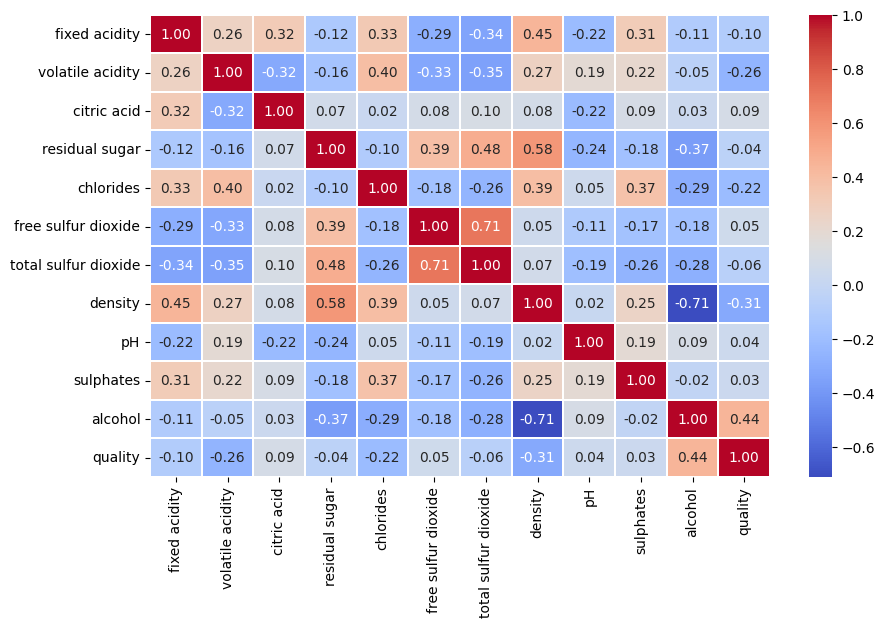

In [86]:
corr = df.corr()
plt.figure(figsize=(10,6))
hm = sns.heatmap(corr, annot=True, cmap="coolwarm",fmt='.2f', linewidths=.05)

In [87]:
X = df[["alcohol", "fixed acidity"]]  # незалежні змінні
y = df["density"]                     # залежна змінна (найкращі результати R² були саме з цією комбінацією)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=228)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()
y_pred = model.predict(X_test_const)

print("done")

done


Написати рівняння множинної регресії.

In [88]:
params = model.params
print(f"Рівняння регресії: density = {params.iloc[0]:.7f} + {params.iloc[1]:.7f}*alcohol + {params.iloc[2]:.7f}*fixed_acidity")

Рівняння регресії: density = 1.0055424 + -0.0016807*alcohol + 0.0009260*fixed_acidity


Намалювати лінію регресії.

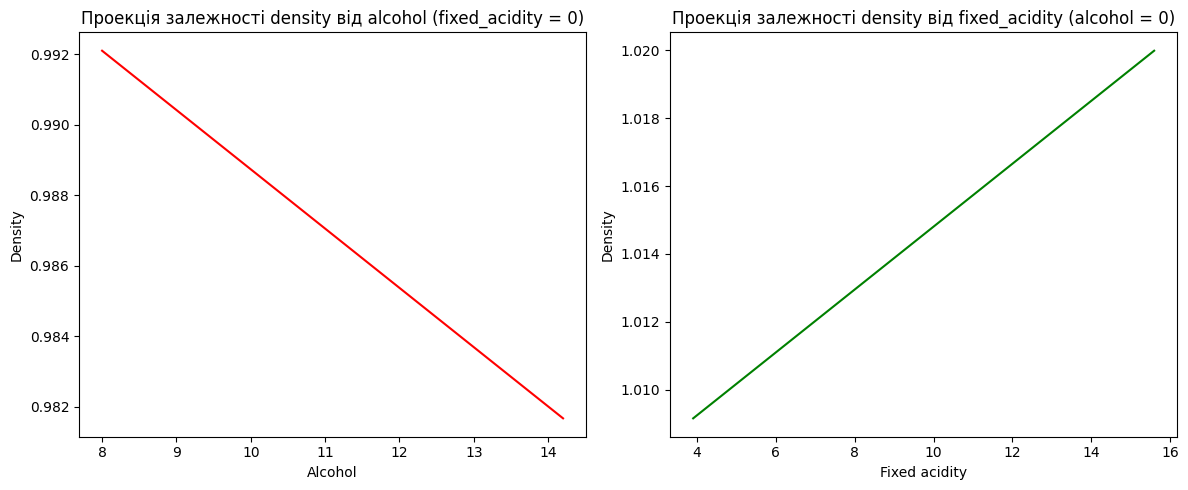

In [89]:
b0 = 1.0055424
b1 = -0.0016807  # для alcohol
b2 = 0.0009260   # для fixed_acidity

alcohol_range = np.linspace(df['alcohol'].min(), df['alcohol'].max(), 100)
fixed_range = np.linspace(df['fixed acidity'].min(), df['fixed acidity'].max(), 100)

density_alcohol = b0 + b1 * alcohol_range + b2 * 0
density_fixed = b0 + b1 * 0 + b2 * fixed_range

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(alcohol_range, density_alcohol, color='red')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('Проекція залежності density від alcohol (fixed_acidity = 0)')

plt.subplot(1, 2, 2)
plt.plot(fixed_range, density_fixed, color='green')
plt.xlabel('Fixed acidity')
plt.ylabel('Density')
plt.title('Проекція залежності density від fixed_acidity (alcohol = 0)')

plt.tight_layout()
plt.show()

Порахувати показники: RSS, RMSE, RSE, R^2, t_b. На їх основі оцінити регресію.

In [90]:
RSS = np.sum((y_test - y_pred) ** 2)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RSE = np.sqrt(RSS / (len(y_test) - X_test_const.shape[1] - 1))
R2 = r2_score(y_test, y_pred)

t_b = model.tvalues
print(f"t-статистики:\n{t_b}\n")

print(f"RSS = {RSS:.3f}")
print(f"RMSE = {RMSE:.3f}")
print(f"RSE = {RSE:.3f}")
print(f"R² = {R2:.3f}")


t-статистики:
const            2876.250593
alcohol           -63.348966
fixed acidity      36.201938
dtype: float64

RSS = 0.011
RMSE = 0.002
RSE = 0.002
R² = 0.624


Значення коефіцієнта детермінації R² = 0.624 свідчить, що модель пояснює близько 62% варіації цільової змінної. Показники похибки (RSS=0.011, RMSE=0.002, RSE=0.002) мають низькі значення, що свідчить про високу точність моделі. Усі коефіцієнти моделі мають великі t-статистики, тобто є статистично значущими, а отже, кожен предиктор істотно впливає на результат.

Використовуючи регресію та оцінки похибки, побудувати передбаченя на 3 кроки вперед.

In [91]:
new_data = pd.DataFrame({
    "alcohol": [10.5, 11.0, 11.3],
    "fixed acidity": [7.0, 6.8, 6.9]
})

new_data_const = sm.add_constant(new_data)
new_pred = model.predict(new_data_const)

RSE = 0.002
error = 2 * RSE

pred_df = pd.DataFrame({
    "alcohol": new_data["alcohol"],
    "fixed acidity": new_data["fixed acidity"],
    "predicted_density": new_pred,
    "lower_bound": new_pred - error,
    "upper_bound": new_pred + error
})

print("Прогноз на 3 кроки вперед, враховуючи похибку:")
pred_df.head()

Прогноз на 3 кроки вперед, враховуючи похибку:


,alcohol,fixed acidity,predicted_density,lower_bound,upper_bound
0,10.5,7.0,0.994377,0.990377,0.998377
1,11.0,6.8,0.993351,0.989351,0.997351
2,11.3,6.9,0.992940,0.988940,0.996940
